# Project 1: SAT/ACT Score EDA through Pandemic
#### Exploring the changes in standardised testing through the pandemic years (2020 and 2021) and observing its impacts through a couple of lenses

In the past year, articles like this one from [Forbes](https://www.forbes.com/sites/michaeltnietzel/2021/10/13/the-number-of-students-taking-the-act-dropped-22-this-year/?sh=664f37f7c60a) have aluded to a greater movement of colleges away from requiring standardised testing as part of their assessment criteria, quite possibly catalysed by the constraints brought along by the global COVID pandemic.

This EDA project will focus on the following:
1. To look at the scores and participation rates directly - to observe the trends of their development and fluctuation to both localised and external factors over the years. This will largely focus on the 2017 to 2021 mean scores and participation rates, sorted by state; the latter two years of which as a proxy to COVID pandemic-related geopolitical effects.  

2. Extrapolate and explore other possible correlated metrics that may highlight a <b><i>disparity in impact</i></b> in some way on some states rather than others. Whilst there are many parameters and socio-political factors to choose from, this project will focus on i) <b>State Government Affiliation</b> (that is to say, which one of th bi-partisan parties control the politics in a given state), and ii) <b>population demographic</b> in any given state.

In [1]:
# Importing the packages used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Provided Sources:
1. SAT 2017 to 2019 data (../data/sat_{year}.csv)
2. ACT 2017 to 2019 data (../data/act_{year}.csv)

### Additional Sources:  
1. SAT 2020 data - https://nces.ed.gov/programs/digest/d20/tables/dt20_226.40.asp
2. SAT 2021 data - https://www.testgeek.com/blog/a-look-at-the-average-sat-score-by-state/
3. ACT 2020 data - https://nces.ed.gov/programs/digest/d20/tables/dt20_226.60.asp
4. ACT 2021 data - https://nces.ed.gov/programs/digest/d21/tables/dt21_226.60.asp
 
### Other, potentially related data:
1. States by government afiliation (using state government control as a proxy) - https://ballotpedia.org/State_government_trifectas
2. State population by race - https://worldpopulationreview.com/states/states-by-race

## Part 1.1 - SAT Scores

In [2]:
# Import in sat tables
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')

In [3]:
# Check shape
print(sat_2017.shape)
print(sat_2018.shape)
print(sat_2019.shape)

(51, 5)
(51, 5)
(53, 5)


In [4]:
# Generic histogram plot for multiple years
def histo_state(data_df,value, bins = 12):
    tmp_plot = data_df.melt(id_vars = 'State')[:]
    tmp_plot.columns = ['State','Year',value]
    tmp = sns.FacetGrid(tmp_plot, col = 'Year', height = 6, aspect = 1)
    return tmp.map(sns.histplot, value, bins = bins)

#### Extra States
Upon some investigation, we realise that the extra rows refer to Puerto Rico and the Virginia Islands, which are both not states, but rather US colonies or special zones. As we lack data to compare them with, we will drop them from the 2019 table.

In [5]:
# Prepping the columns for merging - adding prefixes for sorting
for year in ['2017','2018','2019']:
    if year in globals()['sat_' + year].columns[1]:
        break
    else:
        globals()['sat_' + year] = globals()['sat_' + year].rename(
            dict(
                zip(globals()['sat_' + year].columns,
                    [n + '_' + year if n != 'State' else n for n in globals()['sat_' + year].columns]
                   )),
            axis = 1
        )

In [6]:
print(sat_2017.columns)
print(sat_2018.columns)
print(sat_2019.columns)

Index(['State', 'Participation_2017',
       'Evidence-Based Reading and Writing_2017', 'Math_2017', 'Total_2017'],
      dtype='object')
Index(['State', 'Participation_2018',
       'Evidence-Based Reading and Writing_2018', 'Math_2018', 'Total_2018'],
      dtype='object')
Index(['State', 'Participation Rate_2019', 'EBRW_2019', 'Math_2019',
       'Total_2019'],
      dtype='object')


In [7]:
#Renaming columns for each of the dataframes to make more sense wrt each other
sat_2019.rename({sat_2019.columns[1]:'Participation_2019'}, axis = 1, inplace = True)

In [8]:
sat_2018.rename({sat_2018.columns[2]:'EBRW_2018'}, axis = 1, inplace = True)

In [9]:
sat_2017.rename({sat_2017.columns[2]:'EBRW_2017'}, axis = 1, inplace = True)

In [10]:
#Merge tables
sat_agg = sat_2017.merge(sat_2018, 
               how = 'outer', 
               left_on = 'State', 
               right_on = 'State'
              ).merge(sat_2019, 
                      how = 'outer', 
                      left_on = 'State', 
                      right_on = 'State'
                     )

In [11]:
# Creating Separate dataframe just for Total/Mean SAT scores from existing source

#sat mean aggregate
sat_agg_mean = sat_agg[:]
for i in sat_agg_mean.columns[1:]: # Remove all non-essential columns
    if 'Total' not in i:
        sat_agg_mean = sat_agg_mean.drop(columns = i)
        
sat_agg_mean.columns = ['State',2017,2018,2019] # Rename columns with year data only
sat_agg_mean.dropna(axis = 0, inplace = True) # Remove Puerto Rico and Virginia Islands

for i in sat_agg_mean.columns[1:]:
    sat_agg_mean[i] = sat_agg_mean[i].astype(int)

    
#sat participation
sat_agg_part = sat_agg[:] # Remove all non-essential columns
for i in sat_agg_part.columns[1:]:
    if 'Participation' not in i:
        sat_agg_part = sat_agg_part.drop(columns = i)
sat_agg_part.columns = ['State',2017,2018,2019]

sat_agg_part.dropna(axis = 0, inplace = True) # Remove NaN values
sat_agg_part.replace('%','',regex = True, inplace = True) # Remove percentage string formatting

for i in sat_agg_part.columns[1:]:
    sat_agg_part[i] = sat_agg_part[i].astype(int)

In [12]:
print(sat_agg_mean.shape)
print(sat_agg_part.shape)

(51, 4)
(51, 4)


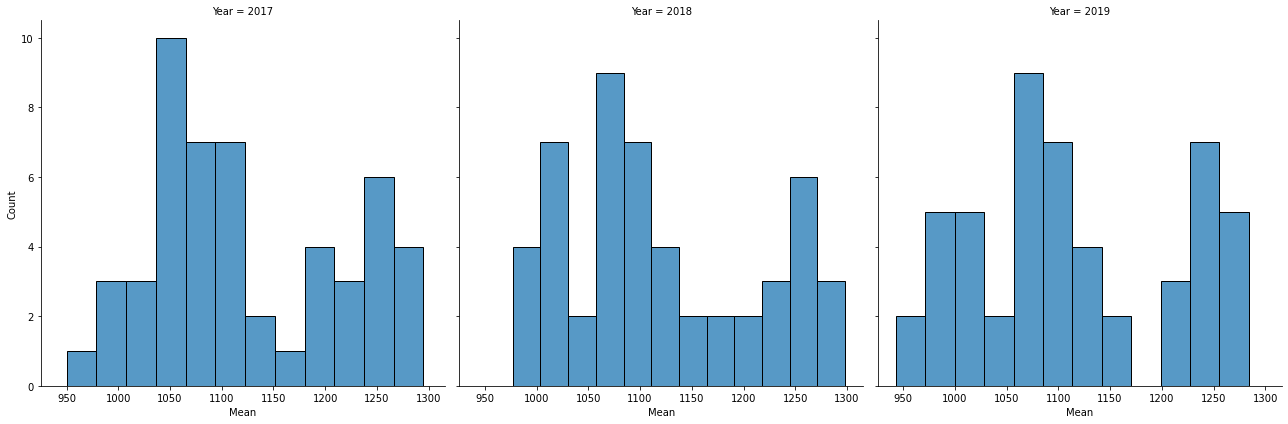

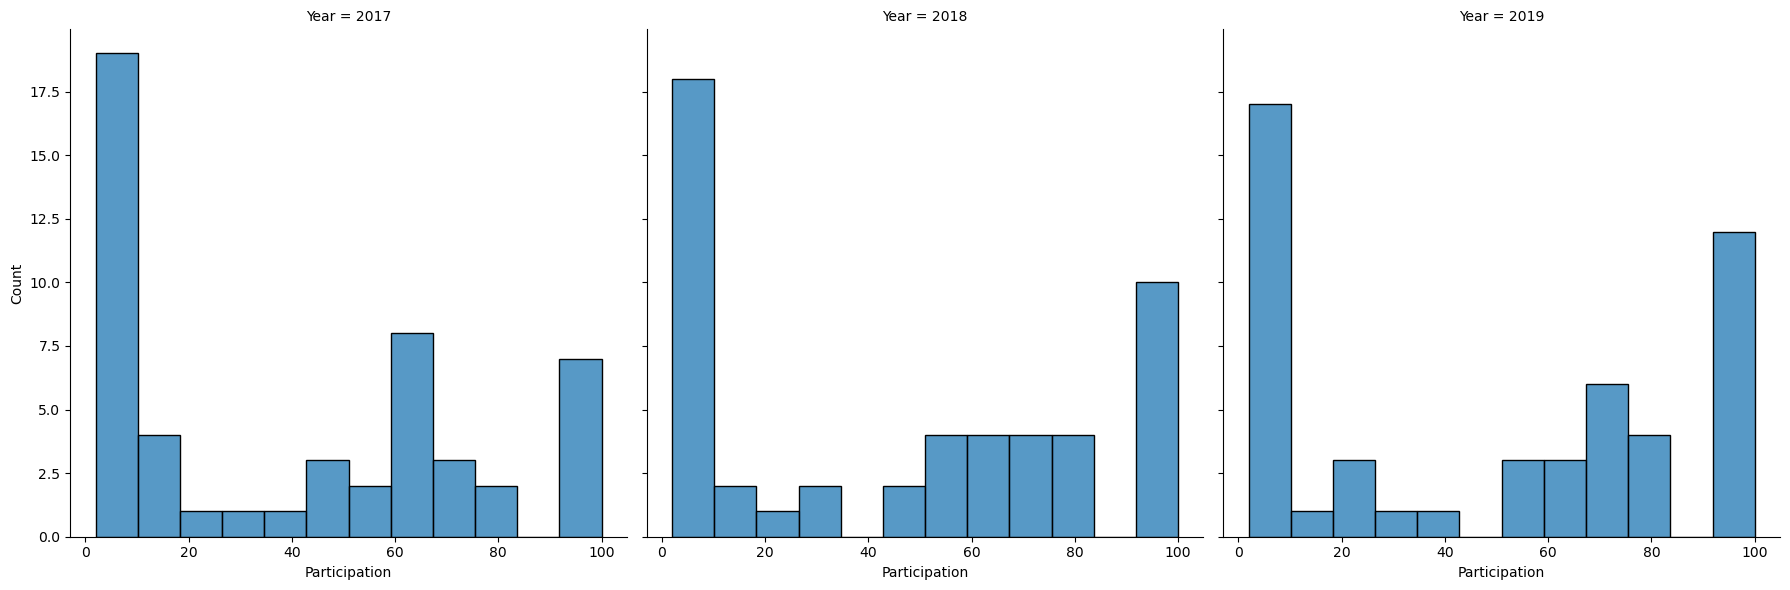

In [13]:
# Plotting year against mean - 2017 to 2019 sets a baseline for us to compare to
histo_state(sat_agg_mean,'Mean')
histo_state(sat_agg_part, 'Participation');

#### So far so good
Now to add in 2020 and 2021 data. The sources for 2020 in particular also include 2017-2019 data, so we'll use this to check our existing datasets for consistency.

In [14]:
# Formatting external Sat data from 2017 to 2020
sat_2020 = pd.read_csv('../data/sat_2017_2020_byState.csv')

In [15]:
for i in sat_2020.columns:
    if ('ERW' in i) or ('SD' in i) or ('Math' in i):
        sat_2020.drop(columns = i, inplace = True)

# Dropping United States row (i.e. the aggregate row) as it is not useful for comparison in this respect
if sat_2020['State'][0] == 'United States':
    sat_2020 = sat_2020.drop(0).reset_index().drop(columns = 'index')

print(sat_2020.dtypes)
print(sat_2020.shape)

State            object
SAT_Mean_2017     int64
Prcnt_2017        int64
SAT_Mean_2018     int64
Prcnt_2018        int64
SAT_Mean_2019     int64
Prcnt_2019        int64
SAT_Mean_2020     int64
Prcnt_2020        int64
dtype: object
(51, 9)


In [16]:
sat_2020_mean = sat_2020
for i in sat_2020_mean.columns:
    if 'Prcnt' in i:
        sat_2020_mean = sat_2020_mean.drop(columns = i)
sat_2020_mean.columns = ['State',2017,2018,2019,2020]

sat_2020_part = sat_2020
for i in sat_2020_part.columns:
    if 'Mean' in i:
        sat_2020_part = sat_2020_part.drop(columns = i)
sat_2020_part.columns = ['State',2017,2018,2019,2020]

print(sat_2020_mean.shape)
print(sat_2020_part.shape)

(51, 5)
(51, 5)


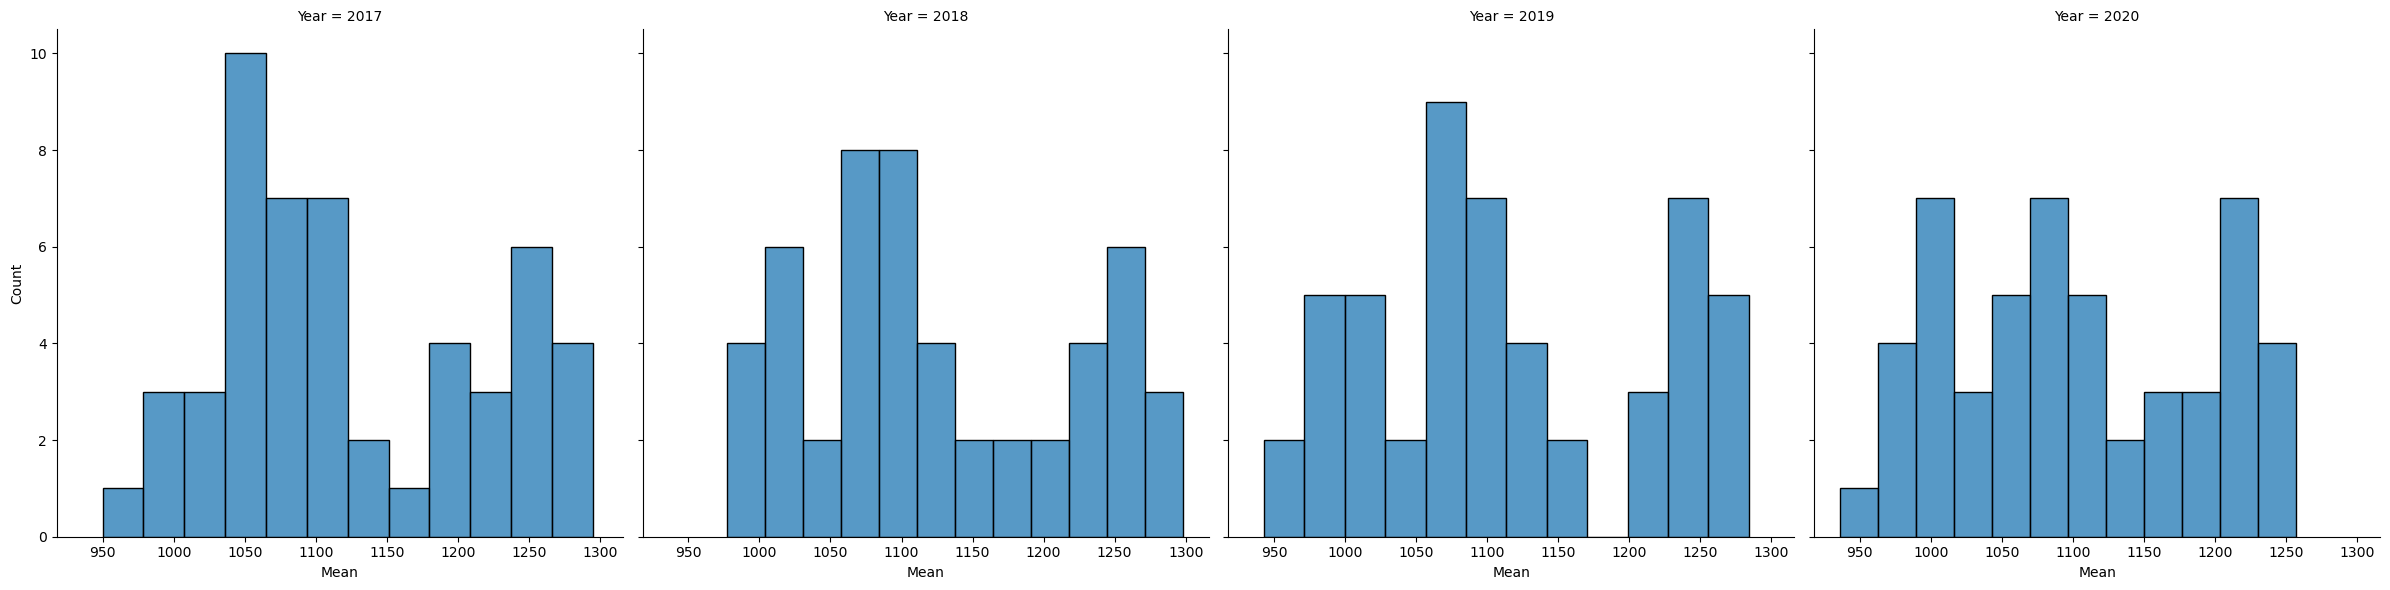

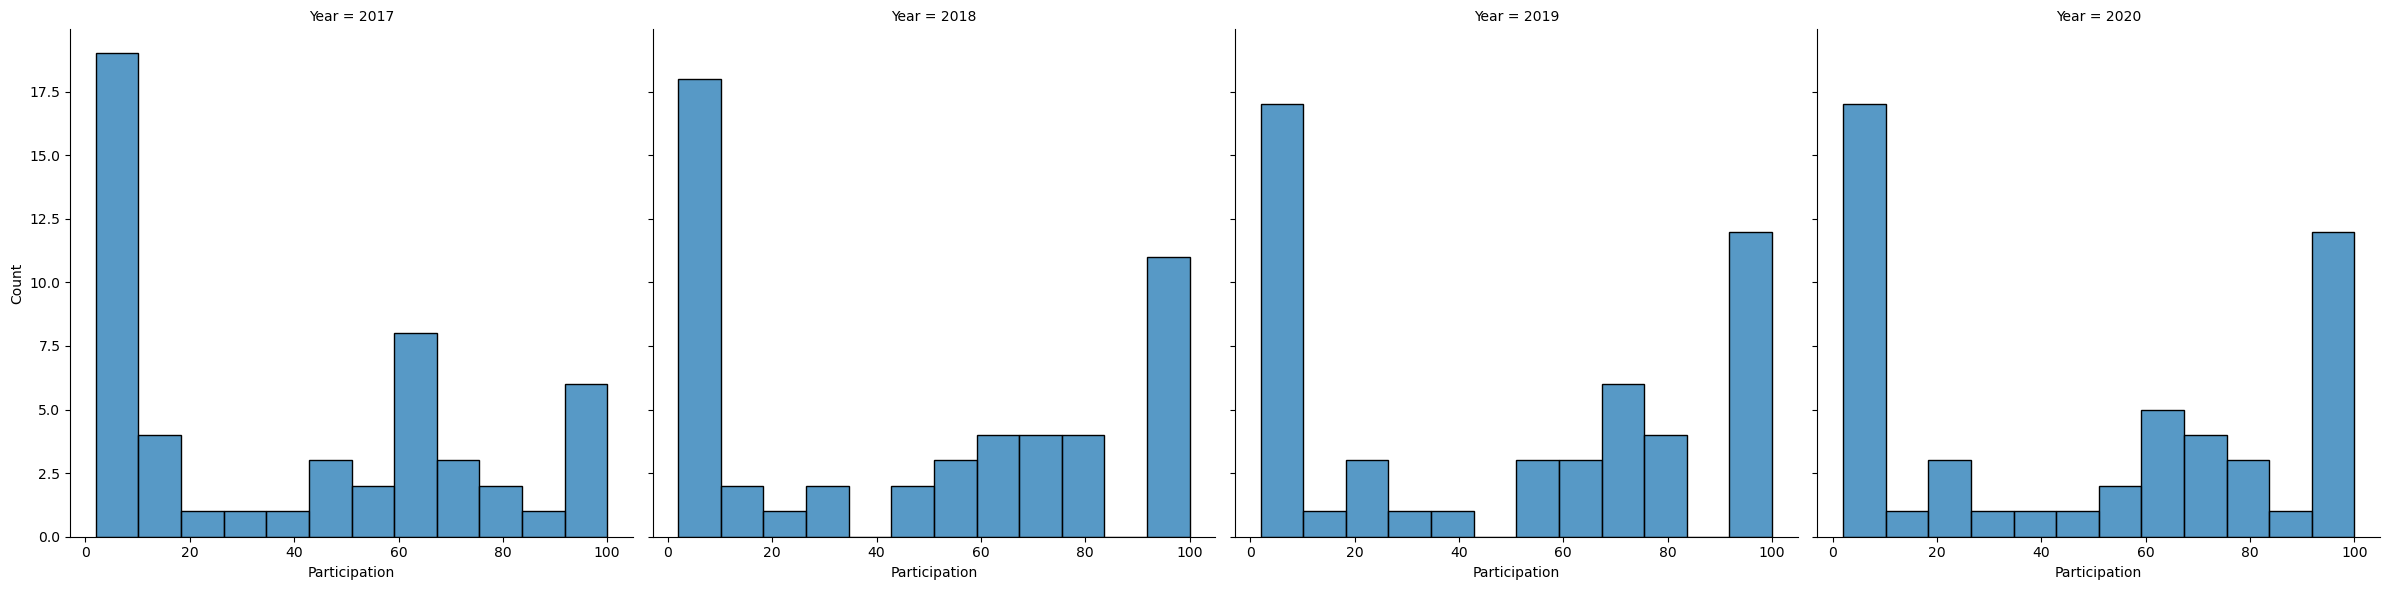

In [17]:
# Checking plots by year of mean and participation on external data source
histo_state(sat_2020_mean, "Mean")
histo_state(sat_2020_part, "Participation");

In [18]:
# Checking the data against the external source
for i in sat_agg_mean.columns[:]:
    print(f"column {i}: {list(sat_agg_mean[i]) == list(sat_2020_mean[i])}")

# From our quick values check, we can see there is some difference in the 2018 data
elog = [sat_agg_mean[2018][i] == sat_2020_mean[2018][i] for i in range(len(sat_agg_mean[2018]))]
elog_2018 = pd.DataFrame(data = sat_agg_mean['State'])
elog_2018['2018-1'] = sat_agg_mean[2018]
elog_2018['2018-2'] = sat_2020_mean[2018]
elog_2018['equal?'] = elog

# 5 data points have inconsistent data, to do with 5 states: Utah, SDakota, Florida, Hawaii, Indiana
elog_2018.sort_values(['equal?']).head(10)

column State: True
column 2017: True
column 2018: False
column 2019: True


,State,2018-1,2018-2,equal?
44,Utah,1010,1230,False
41,South Dakota,1240,1241,False
9,Florida,1099,1014,False
11,Hawaii,1010,1099,False
14,Indiana,1074,1086,False
0,Alabama,1166,1166,True
29,New Hampshire,1063,1063,True
30,New Jersey,1094,1094,True
31,New Mexico,1093,1093,True
32,New York,1068,1068,True


##### Some notes at this juncture:
1. The rest of the data (<i>save for 2018</i>) are identical;
2. For 2018, there are only 5 data points that are inconsistent - that being said, the inconsistency is fair significant, and not due to rounding. 

For the purposes of this project, we will assume the given data is correct, and will be used. This is also done to be consistent with the rest of the analyses being done by the rest of the class.

In [19]:
print(sat_agg_mean.shape)
print(sat_2020_mean.shape)
print(list(sat_agg_mean['State']) == list(sat_2020_mean['State']))

print(sat_agg_part.shape)
print(sat_2020_part.shape)
print(list(sat_agg_part['State']) == list(sat_2020_part['State']))

(51, 4)
(51, 5)
True
(51, 4)
(51, 5)
True


In [20]:
sat_mean = pd.DataFrame(data = sat_agg_mean[:])
sat_mean[2020] = sat_2020_mean[2020]

sat_part = pd.DataFrame(data = sat_agg_part[:])
sat_part[2020] = sat_2020_part[2020]

In [21]:
# Read 2021 data
sat_2021 = pd.read_csv('../data/sat_2021.csv')

# Dropping National row (i.e. the aggregate row) as it is not useful for comparison in this respect
if sat_2021['State'][0] == 'National':
    sat_2021 = sat_2021.drop(0).reset_index().drop(columns = 'index')

# Same as other data, dropping Virgin Islands and Puerto Rico
sat_2021.dropna(axis = 0, inplace = True)
sat_2021.reset_index(inplace = True)

In [22]:
# Check if state index is the same
list(sat_2021['State']) == list(sat_mean['State'])

True

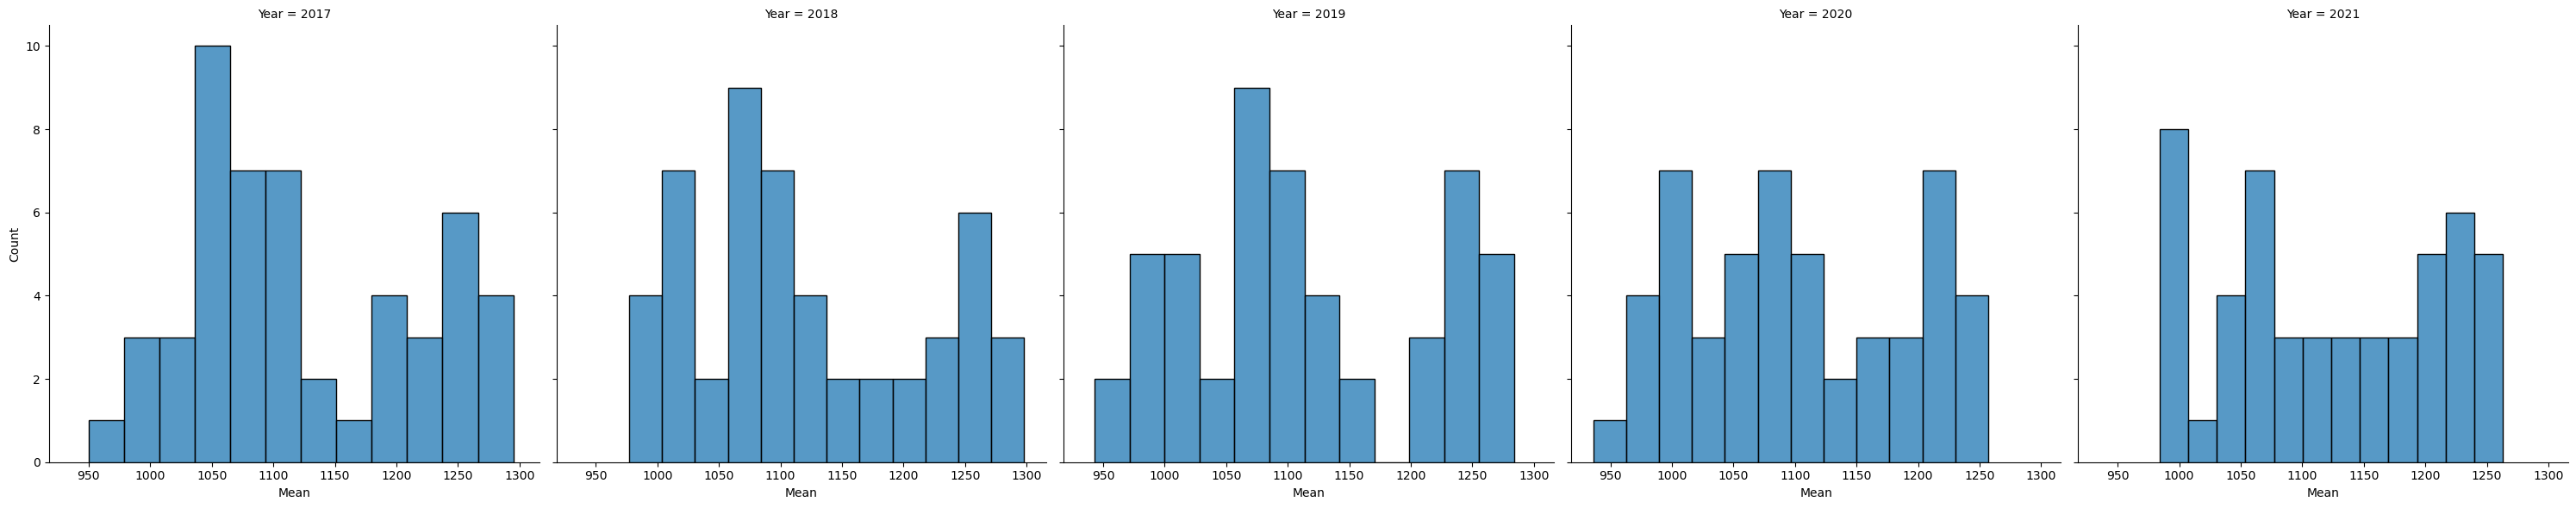

In [23]:
# Consolidate mean/participation data into a single DataFrame
sat_mean[2021] = sat_2021['Mean_2021'].values

histo_state(sat_mean,'Mean');

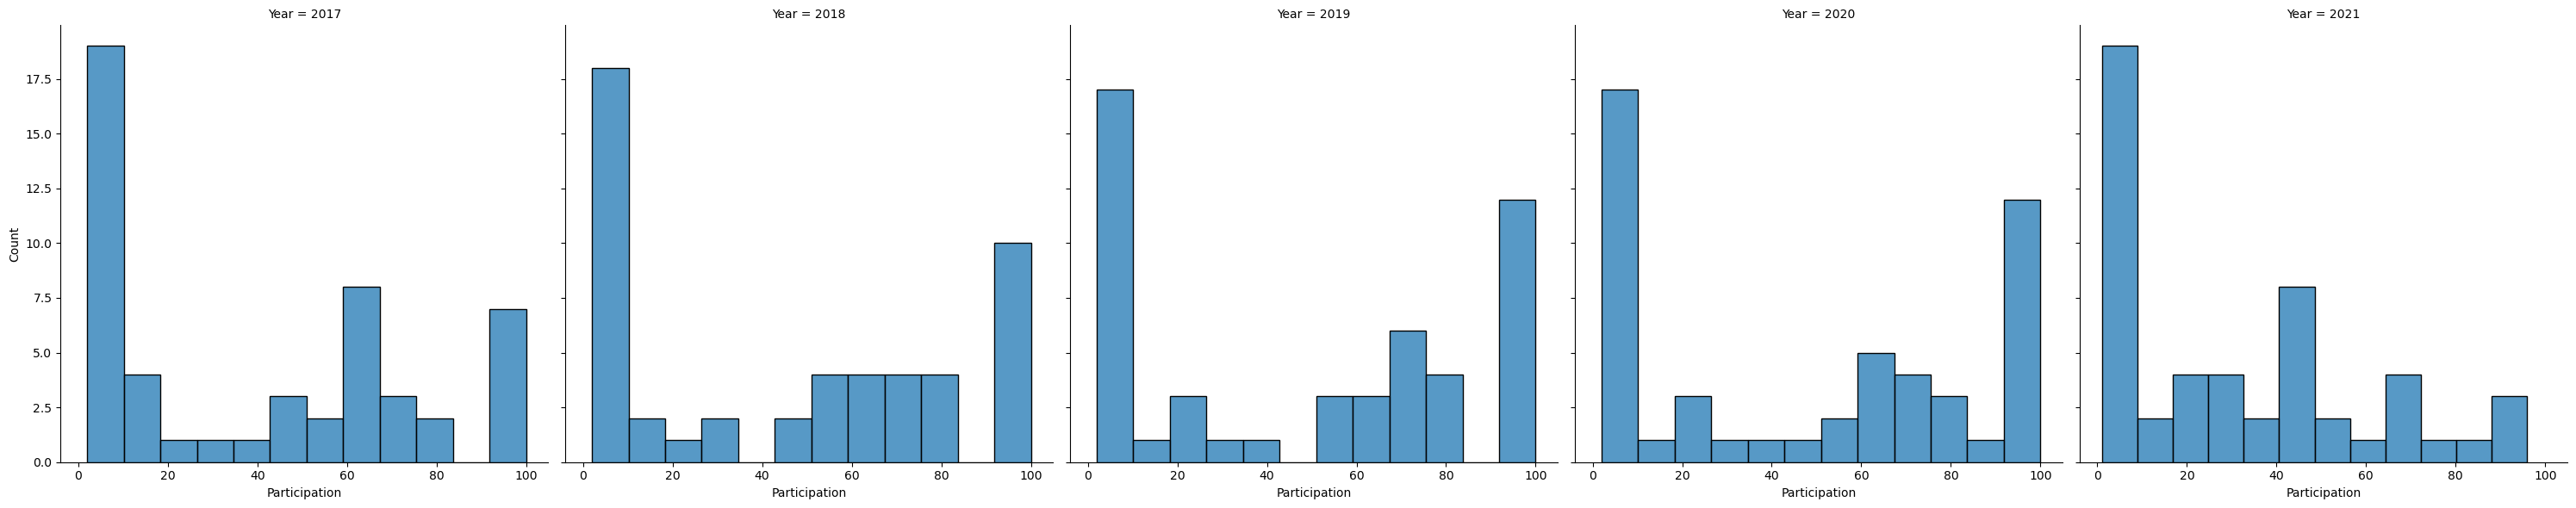

In [24]:
# Participation data
sat_part[2021] = sat_2021[['Participation_2021']].replace("%","", regex = True)
for i in sat_part.columns[1:]:
    sat_part[i] = sat_part[i].astype(int)

histo_state(sat_part,'Participation');

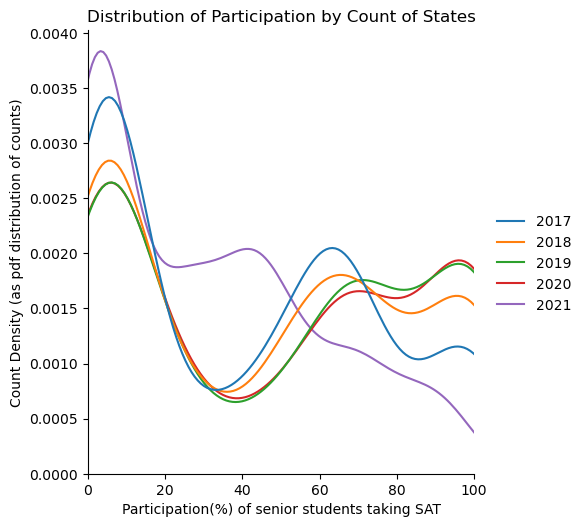

In [25]:
part_plot = sat_part.melt(id_vars = 'State')[:]
part_plot.columns = ['State','Year','Participation']

sns.displot(sat_part, kind = 'kde', bw_adjust = 0.62)
plt.xlim(0,100);
plt.xlabel("Participation(%) of senior students taking SAT")
plt.ylabel("Count Density (as pdf distribution of counts)")
plt.title("Distribution of Participation by Count of States");

The above graph is a little cluttered, but it does help to illustrated a specific point: whilst 2019 and 2020 were fairly close in their distribution of SAT participation, and 2017 and 2018 show similar behaviour too, the participation of SAT presents a significant decrease (as evident by the change in skew towards the left of the graph) in 2021.

Another observation is that prior to 2021, the trend of participation was actually going up, peaking in 2020, followed by a significant decrease of 2021 participation rates.


## Part 1.2: Same Treatment for ACT scores

In [26]:
act_2017 = pd.read_csv('../data/act_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')

In [27]:
print(act_2017.dtypes)
print(act_2018.dtypes)
print(act_2019.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object
State             object
Participation     object
Composite        float64
dtype: object
State             object
Participation     object
Composite        float64
dtype: object


In [28]:
print(act_2017.shape)
print(act_2018.shape)
print(act_2019.shape)

(52, 7)
(52, 3)
(52, 3)


In [29]:
# Let's shrink the dataframes down to just participation and mean aggregate scores
# Removing National (aggregate) rows
for i in ['2017','2018','2019']:
    globals()['act_' + i] = globals()['act_' + i][globals()['act_' + i]['State'] != 'National'
                                                 ].reset_index().drop(columns = ['index','level_0'], errors = 'ignore')

In [30]:
# Checking shape again
print(act_2017.shape)
print(act_2018.shape)
print(act_2019.shape)

(51, 7)
(52, 3)
(51, 3)


In [31]:
# 1. Investigating why act_2017's Composite column is classified as strings
# act_2017 # confirmed the string is in 'Wyoming'
act_2017[act_2017['State'] == 'Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
50,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [32]:
# Correcting Wyoming string
act_2017.loc[50,['Composite']] = 20.2
act_2017['Composite'] = act_2017['Composite'].astype(float)

In [33]:
# 2. Checking discrepancy between States represented between 2017 and 2018
# Sum of True values should equal the number of states
sum(dict(zip(act_2018['State'],
             [act_2018['State'][i] 
              in list(act_2017['State']) 
              for i in range(len(act_2018['State']))])).values()
   ) == len(act_2017['State'])

False

<b>The above sensing reveals two issues:</b>
1. The 'District of Columbia' State is returning a False value for the value check, but looking at both act_2017 and act_2018 we know that they do have a row for this state. I.e. The 'District of Columbia' for act_2018 and act_2019 are not capitalised, and that will need to be updated.
2. If the discrepancy of District of Columbia does not address the discrepancy in rows between 2018, and 2017/2019, then there is probably another issue. Looking into it further (below), we figure out that there is a duplicate row for 'Maine' in 2018. That will need to be addressed as well.

In [34]:
# Upon further inpection, there are two 'Maine' rows in act_2018
# act_2018[act_2018['State'] == 'Maine']
if len(act_2018[act_2018['State'] =='Maine']) > 1:
    act_2018 = act_2018.drop(index = 19).reset_index().drop(columns = 'index')
act_2018[15:25]

,State,Participation,Composite
15,Iowa,68%,21.8
16,Kansas,71%,21.6
17,Kentucky,100%,20.2
18,Louisiana,100%,19.2
19,Maine,7%,24.0
20,Maryland,31%,22.5
21,Massachusetts,25%,25.5
22,Michigan,22%,24.2
23,Minnesota,99%,21.3
24,Mississippi,100%,18.6


In [35]:
# Standardising Spelling of 'District of Columbia'
for i in ['2017','2018','2019']:
    for j in list(globals()['act_' + i][globals()['act_' + i]['State'] == 'District of columbia'].index.values):
        globals()['act_' + i].loc[j,'State'] = globals()['act_' + i].loc[j,'State'].replace('columbia','Columbia')

In [36]:
print(act_2017.loc[8,'State'])
print(act_2018.loc[8,'State'])
print(act_2019.loc[8,'State'])

District of Columbia
District of Columbia
District of Columbia


In [37]:
# Checking again for discrepancies
sum(dict(zip(act_2018['State'],
             [act_2018['State'][i] 
              in list(act_2017['State']) 
              for i in range(len(act_2018['State']))])).values()
   ) == len(act_2017['State'])

True

In [38]:
# Checking dimensions of each table
for i in ['2017','2018','2019']:
    print(globals()['act_'+i].shape)

(51, 7)
(51, 3)
(51, 3)


In [39]:
# Checking if the State order is the same in all the tables
print(list(act_2017['State']) == list(act_2018['State']))
print(list(act_2017['State']) == list(act_2019['State']))
print(list(act_2017['State']) == list(sat_part['State'])) # Just checking this also haha

True
True
True


The last thing to be done is to remove the unnecessary rows from act_2017, and merge the columns into two focused dataframes; one for mean (<i>composite</i>), and one for participation rates.

In [40]:
# Creating DataFrame for Act mean
act_mean = pd.DataFrame(data = act_2017['State'])
act_mean[2017] = act_2017['Composite']
act_mean[2018] = act_2018['Composite']
act_mean[2019] = act_2019['Composite']
act_mean = act_mean.astype(float, errors = 'ignore')
act_mean.dtypes

State     object
2017     float64
2018     float64
2019     float64
dtype: object

In [41]:
# Creating DataFrame for Act participation
act_part = pd.DataFrame(data = act_2017['State'])
act_part[2017] = act_2017['Participation']
act_part[2018] = act_2018['Participation']
act_part[2019] = act_2019['Participation']
act_part.replace('%','', regex = True, inplace = True)
act_part = act_part.astype(float, errors = 'ignore')
act_part.dtypes

State     object
2017     float64
2018     float64
2019     float64
dtype: object

In [42]:
# histo_state(act_mean,'Mean')
# histo_state(act_part,'Participation')

In [43]:
# Adding 2020 and 2021 data
act_2020 = pd.read_csv('../data/act_2020.csv')
act_2021 = pd.read_csv('../data/act_2021.csv')

In [44]:
# Checking the State order of the 2020 and 2021 tables
print(list(act_mean['State']) == list(act_2020['State']))
print(list(act_mean['State']) == list(act_2021['State']))
print(list(act_part['State']) == list(act_2020['State']))
print(list(act_part['State']) == list(act_2021['State']))

True
True
True
True


In [45]:
# Adding mean data to existing mean table, then checking the merge, and object types
act_mean[2020] = act_2020['Mean']
act_mean[2021] = act_2021['Mean']
print(act_mean.dtypes)
act_mean.head()

State     object
2017     float64
2018     float64
2019     float64
2020     float64
2021     float64
dtype: object


,State,2017,2018,2019,2020,2021
0,Alabama,19.2,19.1,18.9,18.8,18.7
1,Alaska,19.8,20.8,20.1,20.1,20.6
2,Arizona,19.7,19.2,19.0,19.1,19.8
3,Arkansas,19.4,19.4,19.3,19.0,19.0
4,California,22.8,22.7,22.6,23.3,26.1


In [46]:
# Same treatment for Participation!
# Note: even though the object types for the columns are different (float/int), they are inconsequential for qualitative
# analysis. Anyway both types are numeric, so calculation can still be done if need be.
act_part[2020] = act_2020['Participation']
act_part[2021] = act_2021['Participation']
print(act_part.dtypes)
act_part.head()

State     object
2017     float64
2018     float64
2019     float64
2020       int64
2021       int64
dtype: object


,State,2017,2018,2019,2020,2021
0,Alabama,100.0,100.0,100.0,100,100
1,Alaska,65.0,33.0,38.0,33,16
2,Arizona,62.0,66.0,73.0,71,35
3,Arkansas,100.0,100.0,100.0,100,99
4,California,31.0,27.0,23.0,19,5


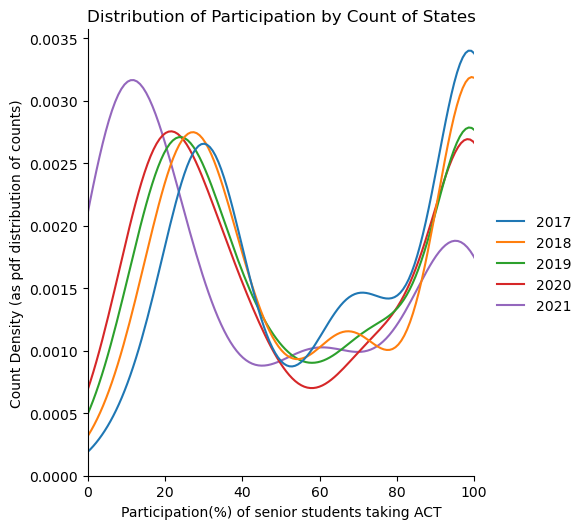

In [47]:
# Plot of Participation as a density function; allows us to qualitatively see where the states are generally clustered.
# Also is a prettier graph than just presenting histograms
sns.displot(act_part, kind = 'kde', bw_adjust = 0.62)
plt.xlim(0,100);
plt.xlabel("Participation(%) of senior students taking ACT")
plt.ylabel("Count Density (as pdf distribution of counts)")
plt.title("Distribution of Participation by Count of States");

Just like the graph for the <i>SAT participation</i>, we notice a similar impact to ACT participation - a shift to the left in the participation rate for ACT tests in year 2021 compared to previous years. Looking at it from another angle below:

,State,2018,2019,2020,2021
0,Alabama,0.0,0.0,0.0,0
1,Alaska,-32.0,5.0,-5.0,-17
2,Arizona,4.0,7.0,-2.0,-36
3,Arkansas,0.0,0.0,0.0,-1
4,California,-4.0,-4.0,-4.0,-14


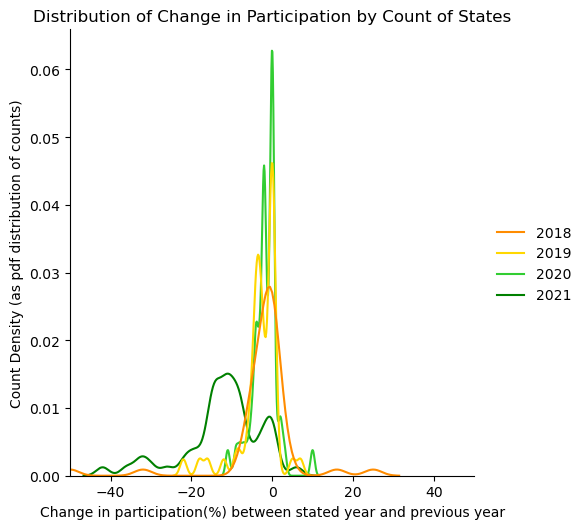

In [48]:
# DataFrame for differences between participation of each year
# Allows us to further isolate drastic changes in participation year-on-year
act_part_diff = pd.DataFrame(data = act_part['State'])

for i in [2018,2019,2020,2021]:
    act_part_diff[i] = (act_part[i] - act_part[i-1])

sns.displot(act_part_diff, kind = 'kde', bw_adjust = 0.35,
            palette = ['darkorange','gold','limegreen','green']
           )
plt.xlim(-50,50);
plt.xlabel("Change in participation(%) between stated year and previous year")
plt.ylabel("Count Density (as pdf distribution of counts)")
plt.title("Distribution of Change in Participation by Count of States");
act_part_diff.head()

This time, we are looking at the <b>change</b> in participation rates between any given year and the previous year. Some indicators on this graph are:
1. The peak at 0 indicates that across 2017 to 2020, there was no significant change to ACT participation (i.e. the higher the peak at 0, the less change there was overall), whilst;
2. We see a significant peak for the 2021 graph on the negative side of the x-axis, indicating that a large number of states actually saw a <i>decrease</i> in participation.  

To provide some statistical certainty, we will conduct two statistical tests:
1. ANOVA on 2017 - 2020 means, to check if H1: the means of the years are equal, and;
2. t-test to check if 2021 has moved in a statistically significant way.

In [49]:
# 1) ANOVA test
# H0: The sample (year) means are all equal
# H1: At least one of the samples means are not equal
from scipy.stats import f_oneway # ANOVA from scipy
stat, p = f_oneway(list(act_part[2017]), list(act_part[2018]), list(act_part[2019]))
print('stat,f=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('H0 is true; the means are equal')
else:
	print('H0 is not true, so H1 must be true; the means are most likely not equal')

stat,f=0.492, p=0.613
H0 is true; the means are equal


In [50]:
# 2) t-test on 2021 against the rest of the data
# H0: The means are equal (i.e. the mean has not shifted significantly enough to make a conclusion)
# H1: The means are not equal (i.e. 2021 has seen a significant enough shift)
from scipy.stats import ttest_ind
list_existing = []
for i in range(2017,2021):
    list_existing += list(act_part[i]) # Creating a composite dataset comprising the 4 years

stat, p = ttest_ind(list_existing, list(act_part[2021]))
print('stat,t=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('H0 is true; the means are equal')
else:
	print('H0 is not true, so H1 must be true; the means are most likely not equal')
print('\n')

stat,t=2.970, p=0.003
H0 is not true, so H1 must be true; the means are most likely not equal




<b>The above statistical tests support our conjectures (at a 5% significance level), that:</b>
1. The participation rates of 2017 - 2020 remained statistically unchanged, and;
2. The 2021 participation rates saw a significant change (decrease), compared to previous years.

There could be a couple of reasons for this (not limited to):
1. During the initial part of the pandemic, there was some legislation which improved the average candidates ability (be it through material or exam fee subsidy) to sit for the SATs/ACTs;
2. From 2020 through to 2022, there was a shift in thinking from a lot of colleges about whether standardised testing was even necessary. This led to huge shift in requirements in the education industry in America, with many colleges moving away from requiring SAT or ACT scores for admission, though they were still optional and used if available.

------
### Part 1.3: Quick look at mean score/ participation correlation
Before we move on to additional factors to study perhaps other metrics that may give insights into the nature of the impact of COVID on standardised testing, we will detour to look a little bit into the relationship between mean and participation rates in both ACT and SAT tests.

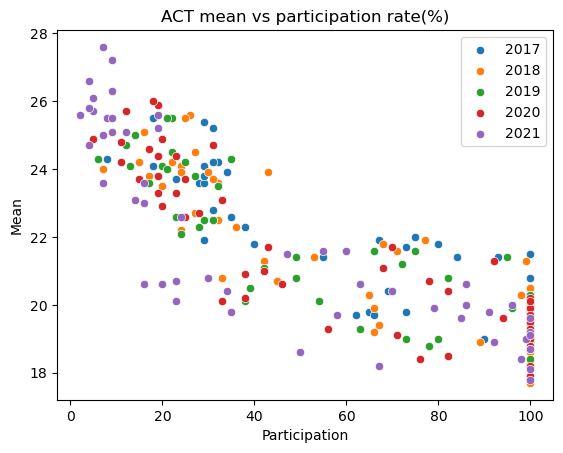

In [51]:
for i in [2017,2018,2019,2020,2021]:
    sns.scatterplot(x = act_part[i], y = act_mean[i]);
plt.xlabel('Participation')
plt.ylabel('Mean')
plt.title('ACT mean vs participation rate(%)')
plt.legend([2017,2018,2019,2020,2021]);

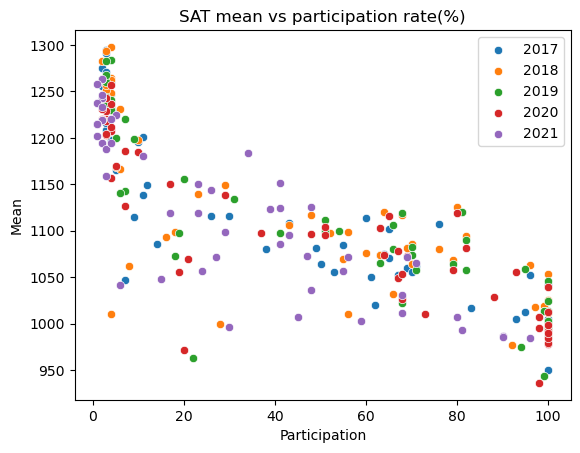

In [52]:
for i in [2017,2018,2019,2020,2021]:
    sns.scatterplot(x = sat_part[i], y = sat_mean[i]);
plt.xlabel('Participation')
plt.ylabel('Mean')
plt.title('SAT mean vs participation rate(%)')
plt.legend([2017,2018,2019,2020,2021]);

From the data above, it would seem that there is some correlation between mean and participation rate; that is, the low the overall participation rate, the higher the average mean score is in that state. The effect seems to be more pronounced for the SATs than ACTs.

This is probably indication of some form of 'survivorship bias', whereby as you go through from a larger pool of candidates to a smaller pool, the people left in the pool are more likely to be more motivated, more driven, and generally more capable to get better test scores, the effect of which would be interesting to explore in the future. These insights however, are outside the scope of this exploratory analysis.

## Part 2: Mapping Other Factors and Studying Correlation
In part 2, we will be looking at a couple of other geopolitical factors, to attempt to study whether the impacts above have disproportionate effects depending what angle you look at the data from.

### Part 2.1: Looking at state government afiliation
https://ballotpedia.org/State_government_trifectas

In [53]:
# Reading data from
state_data = pd.read_csv('../data/State_political.csv')
state_data.head()

,State,Trifecta status,Year of last status change,2017,2018,2019,2020,2021
0,Alabama,Republican trifecta,2011,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta
1,Alaska,Divided government,2015,Divided government,Divided government,Divided government,Divided government,Divided government
2,Arizona,Republican trifecta,2009,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta
3,Arkansas,Republican trifecta,2015,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta
4,California,Democratic trifecta,2011,Democratic trifecta,Democratic trifecta,Democratic trifecta,Democratic trifecta,Democratic trifecta


In [54]:
# This check and next check highlight that the state_data DataFrame is not alphabetically sorted
sum(dict(zip(state_data['State'],
         [state_data['State'][i] 
          in list(act_part['State']) 
          for i in range(len(state_data['State']))])).values()
   ) == len(act_2017['State'])

False

In [55]:
print(state_data.shape)
state_data[state_data['State'] == 'District of Columbia']

(50, 8)


,State,Trifecta status,Year of last status change,2017,2018,2019,2020,2021


The District of Columbia's state government was not included in the source, but this is mainly because the capital of the USA follows the <i>presidency</i>. Thus we can approximate (for our purposes) the presidency as the affiliation of DC.

In [56]:
# District of Columbia is missing - for this data point we can assume the presidency as a proxy for their political
# affiliation, given the laws of the capital follow the federal level.
if 50 not in state_data.index:
    state_data.loc[50,['State',
                       'Trifecta status',
                       'Year of last status change',
                       '2017','2018','2019','2020','2021'
                      ]] = ['District of Columbia',
                            'Democratic trifecta',
                            2020,
                            'Republican trifecta',
                            'Republican trifecta',
                            'Republican trifecta',
                            'Republican trifecta',
                            'Democratic trifecta']

state_data['Year of last status change'] = state_data['Year of last status change'].astype(int)
state_data = state_data.sort_values(by = 'State').reset_index().drop(columns = 'index')
state_data.head()

,State,Trifecta status,Year of last status change,2017,2018,2019,2020,2021
0,Alabama,Republican trifecta,2011,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta
1,Alaska,Divided government,2015,Divided government,Divided government,Divided government,Divided government,Divided government
2,Arizona,Republican trifecta,2009,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta
3,Arkansas,Republican trifecta,2015,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta,Republican trifecta
4,California,Democratic trifecta,2011,Democratic trifecta,Democratic trifecta,Democratic trifecta,Democratic trifecta,Democratic trifecta


In [57]:
list(act_part['State']) == list(state_data['State'])

True

In [58]:
# Some data cleaning so that the dataframe is not too messy
state_data = state_data.replace(' trifecta','', regex = True)
state_data = state_data.replace(' government','', regex = True)
state_data.head()

,State,Trifecta status,Year of last status change,2017,2018,2019,2020,2021
0,Alabama,Republican,2011,Republican,Republican,Republican,Republican,Republican
1,Alaska,Divided,2015,Divided,Divided,Divided,Divided,Divided
2,Arizona,Republican,2009,Republican,Republican,Republican,Republican,Republican
3,Arkansas,Republican,2015,Republican,Republican,Republican,Republican,Republican
4,California,Democratic,2011,Democratic,Democratic,Democratic,Democratic,Democratic


In [59]:
# Define function to generate scatterplot of ACT and SAT
def scatter_state(year):
    tmp_df = pd.DataFrame(data = (act_part['State'], 
                                  state_data[str(year)], 
                                  act_part[int(year)], 
                                  sat_part[int(year)])).T
    tmp_df.columns = ['State','Affiliation','ACT','SAT']
    sns.scatterplot(x = tmp_df['SAT'], 
                    y = tmp_df['ACT'], 
                    hue = tmp_df['Affiliation'],
                    palette = ['red','grey','blue']
                    )
    plt.title(f'ACT and SAT participation(%) by state in {year}')
    plt.xlabel('SAT participation(%)')
    plt.ylabel('ACT participation(%)')

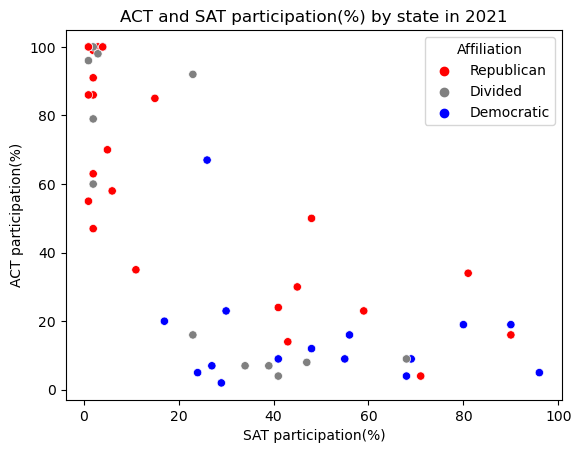

In [60]:
# New DataFrame for 2021 data with affiliation data, + some light data cleaning
scatter_state(2021)

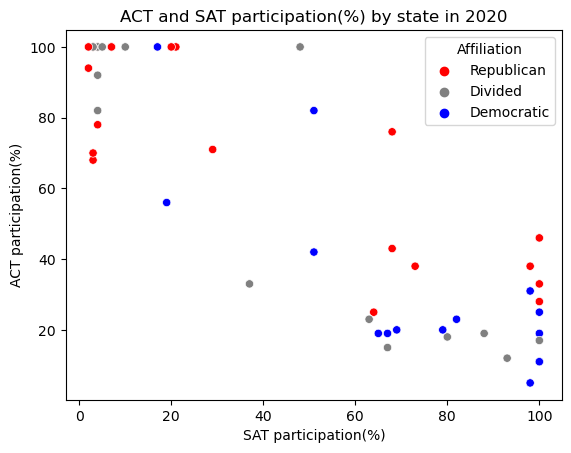

In [61]:
# 2020
scatter_state(2020)

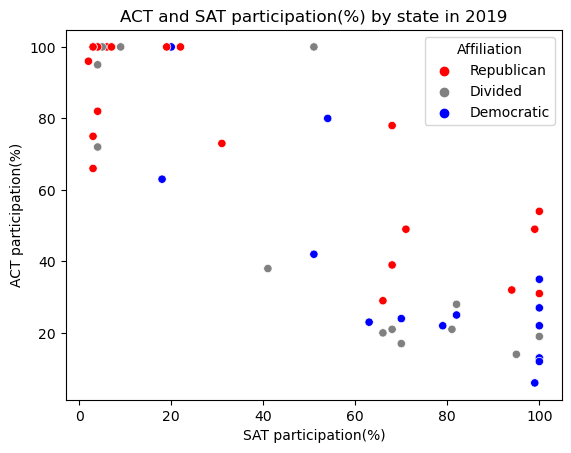

In [62]:
# 2019
scatter_state(2019)

Year-on-year, we do not immediately notice any hard trends in the data. If anything, the states seem all over the place, with a bit of clustering. What does stand out however, is the following couple of observations:
1. There seems to be some bias when it comes to which test a state seems to favour, and its political affiliation at the time. Republican-trifecta states tend to favour the ACT standardised test (to some extent), whilst the Democratic-trifecta states seem to favour the SAT standardised test.
2. If we compare 2021 to the other years, we do notice a significant shift in the distribution towards less participation overall, aligning with our understanding from the Forbes article.

These truths become more apparent when we isolate the data not by year, but by bi-partisan affiliation.

In [63]:
# Generate affiliation-specific scatterplots
def scatter_Aff(aff,year_start,year_end):
    for year in range(int(year_start),int(year_end)+1):
        locals()['tmp_'+str(year)] = pd.DataFrame(data = (act_part['State'], 
                                                  state_data[str(year)], 
                                                  act_part[int(year)], 
                                                  sat_part[int(year)])).T
        locals()['tmp_'+str(year)].columns = ['State','Affiliation','ACT','SAT']
        locals()['tmp_'+str(year)].insert(loc = 2,column = 'Year', value = str(year))
        
        if year == year_start:
            df_name = pd.DataFrame(data = locals()['tmp_'+str(year_start)])
        else:
            df_name = pd.concat([df_name,locals()['tmp_'+str(year)]])
    
    num_start = 5-(year_end - year_start+1)
    sns.scatterplot(x = df_name[df_name['Affiliation'] == aff]['SAT'],
                    y = df_name[df_name['Affiliation'] == aff]['ACT'],
                    hue = df_name[df_name['Affiliation'] == aff]['Year'],
                    palette = ['darkorange','orange','gold','limegreen','green'][num_start:5],
                    alpha = 0.7
                    )
    plt.title(f'{aff} states by ACT/SAT participation(%)')
    plt.xlabel('SAT participation(%)')
    plt.ylabel('ACT participation(%)')

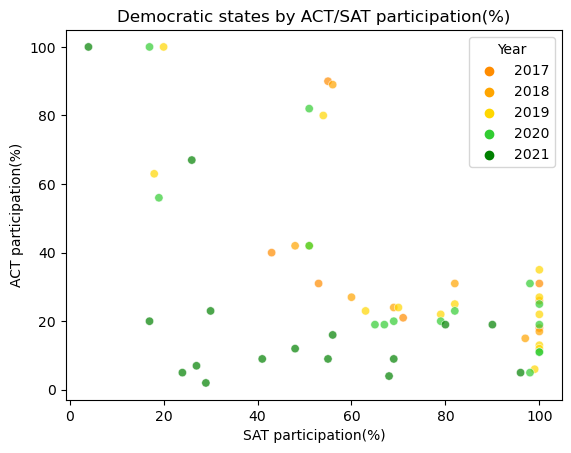

In [64]:
scatter_Aff(aff = 'Democratic',year_start = 2017,year_end = 2021);

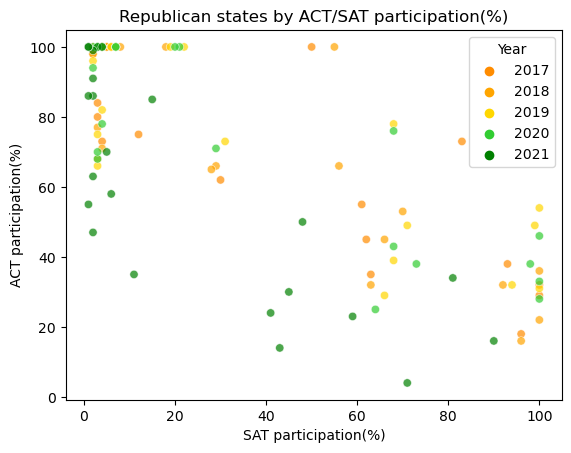

In [65]:
scatter_Aff(aff = 'Republican',year_start = 2017,year_end = 2021);

The clustering of bias towards each test, that is ACT for Republican states and SAT for Democratic states, become more prominent when we compare the participation rates year-on-year, but only including the states with strong single party state governments at the time.

Its important to point out, though, that there is also significant scattering <i>not in</i> the extreme clusters of high/low ACT/SAT participation for Republican states, and low/high ACT/SAT participation for Democratic states.

In [66]:
for year in range(int(2017),int(2021)+1):
        locals()['tmp_'+str(year)] = pd.DataFrame(data = (act_part['State'], 
                                                  state_data[str(year)], 
                                                  act_part[int(year)], 
                                                  sat_part[int(year)])).T
        locals()['tmp_'+str(year)].columns = ['State','Affiliation','ACT','SAT']
        locals()['tmp_'+str(year)].insert(loc = 2,column = 'Year', value = str(year))
        
        if year == 2017:
            aff_part = pd.DataFrame(data = locals()['tmp_'+str(2017)])
        else:
            aff_part = pd.concat([aff_part,locals()['tmp_'+str(year)]])
aff_dummies = pd.get_dummies(columns = ['Affiliation'],data = aff_part)
aff_dummies['ACT'] = aff_dummies['ACT'].astype(int)
aff_dummies['SAT'] = aff_dummies['SAT'].astype(int)

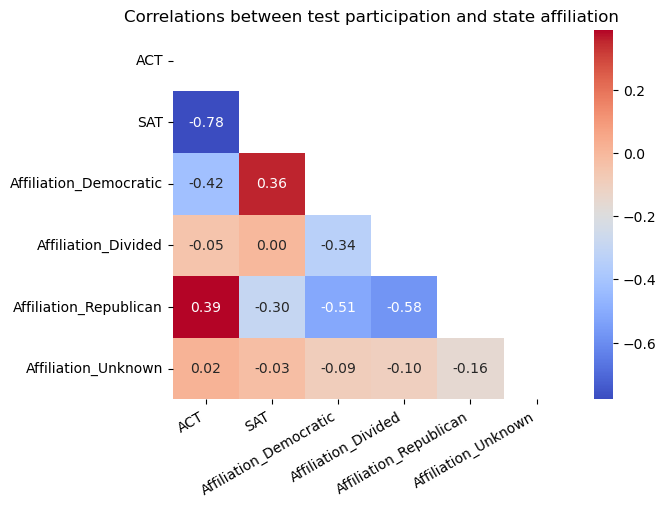

In [67]:
mask = np.zeros_like(aff_dummies.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(aff_dummies.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', mask = mask)
plt.title('Correlations between test participation and state affiliation')
plt.xticks(rotation=30, horizontalalignment = 'right')
plt.yticks(rotation=0);

By looking at the correlations between affiliation and SAT/ACT participation, our conjectures are somewhat confirmed, with a 39%/-30% correlation of Republican states towards ACT/SAT participation respectively, and a -42%/36% correlation for ACT/SAT participation for Democratic states.

This is strong evidence that, while not significant enough to be a powerful indicator, the affiliation of the state-government does perhaps reflect the intrinsic attitude of the underlying population; that a population likely to vote in a Republican government would also favour the ACT over the SAT, and vice versa.

In [68]:
# Generate affiliation-specific scatterplots
def scatter_aff_mean(aff,year_start,year_end):
    for year in range(int(year_start),int(year_end)+1):
        locals()['tmp_'+str(year)] = pd.DataFrame(data = (act_part['State'], 
                                                  state_data[str(year)], 
                                                  act_mean[int(year)], 
                                                  sat_mean[int(year)])).T
        locals()['tmp_'+str(year)].columns = ['State','Affiliation','ACT','SAT']
        locals()['tmp_'+str(year)].insert(loc = 2,column = 'Year', value = str(year))
        
        if year == year_start:
            df_name = pd.DataFrame(data = locals()['tmp_'+str(year_start)])
        else:
            df_name = pd.concat([df_name,locals()['tmp_'+str(year)]])
    
    num_start = 5-(year_end - year_start+1)
    sns.scatterplot(x = df_name[df_name['Affiliation'] == aff]['SAT'],
                    y = df_name[df_name['Affiliation'] == aff]['ACT'],
                    hue = df_name[df_name['Affiliation'] == aff]['Year'],
                    palette = ['darkorange','orange','gold','limegreen','green'][num_start:5],
                    alpha = 0.7
                    )
    plt.title(f'{aff} states by ACT/SAT mean scores')
    plt.xlabel('SAT mean scores')
    plt.ylabel('ACT mean scores')

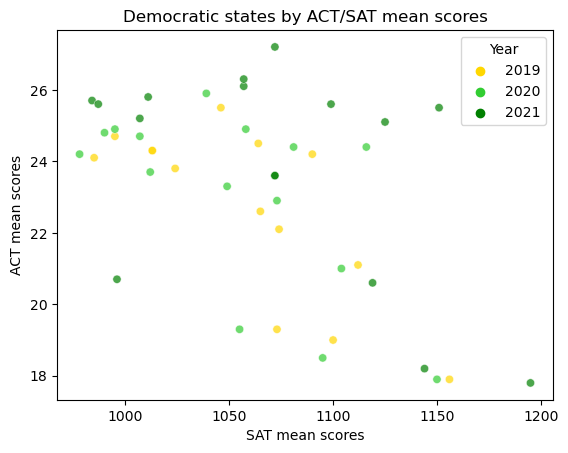

In [69]:
scatter_aff_mean('Democratic',2019,2021)

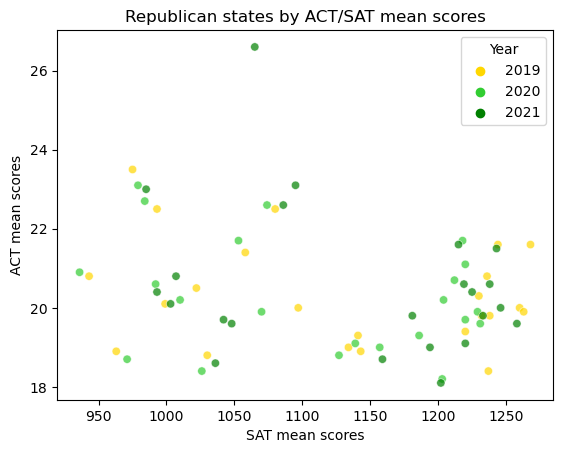

In [70]:
scatter_aff_mean('Republican',2019,2021)

Curiously, when comparing mean scores within state-government affiliation, we notice that the correlation we observed in 1.3 holds true, that on average Republican states had better mean scores in SAT than ACT, and the opposite for Democratic States.

### Part 2.2: ACT and SAT participation, factoring in race demographic
https://worldpopulationreview.com/states/states-by-race  
In this section we will explore whether there is a relationship between the mean scores and participation rates based on their overall population demographics.

In [71]:
race_data = pd.read_csv('../data/state_race_data.csv')
race_data.head()

,State,WhiteTotalPerc,BlackTotalPerc,IndianTotalPerc,AsianTotalPerc,HawaiianTotalPerc,OtherTotalPerc
0,Alabama,0.6750,0.2659,0.0051,0.0139,0.0004,0.0397
1,Alaska,0.6336,0.0324,0.1456,0.0642,0.0142,0.1100
2,Arizona,0.7377,0.0453,0.0434,0.0333,0.0020,0.1382
3,Arkansas,0.7537,0.1520,0.0064,0.0153,0.0035,0.0692
4,California,0.5605,0.0572,0.0079,0.1483,0.0038,0.2223


In [72]:
print(list(race_data['State']) == list(act_part['State']))
print(race_data.shape)
print(act_part.shape)

False
(52, 7)
(51, 6)


In [73]:
# Checking race_data state column against act_part, our existing dataframe
sum(dict(zip(act_part['State'],
             [act_part['State'][i] 
              in list(race_data['State']) 
              for i in range(len(act_part['State']))])).values()
   ) == len(race_data['State'])

False

In [85]:
# Checking act_part against race_data
sum(dict(zip(race_data['State'],
             [race_data['State'][i] 
              in list(act_part['State']) 
              for i in range(len(race_data['State']))])).values()
   ) == len(act_part['State'])

True

In [75]:
# From the above, we know that race_data has an additional State, Puerto Rico.
# We will be removing Puerto Rico, as our other data does not compare it.
race_data = race_data[race_data['State'] != 'Puerto Rico']
race_data = race_data.reset_index(drop = True)

In [76]:
print(list(race_data['State']) == list(act_part['State']))
print(race_data.shape)
print(act_part.shape)

True
(51, 7)
(51, 6)


In [77]:
# Removed "totalperc" from column names as it is redundant
list1 = list(race_data.columns)
list2 = list(map(lambda x: x.replace('TotalPerc',''), list1))
race_data = race_data.rename(dict(zip(list1,list2)), axis = 1)

In [78]:
print('max percentage:')
for i in race_data.columns[1:]:
    print(f'{i}: {max(race_data[i])}')

max percentage:
White: 0.9368
Black: 0.4539
Indian: 0.1456
Asian: 0.3764
Hawaiian: 0.104
Other: 0.2568


In [79]:
race_data[race_data['White'] < 0.5]

,State,White,Black,Indian,Asian,Hawaiian,Other
8,District of Columbia,0.4107,0.4539,0.0035,0.0410,0.0005,0.0905
11,Hawaii,0.2415,0.0188,0.0025,0.3764,0.1040,0.2568


Initially I was thinking of using a catergorical assignment of race to the existing scatterplot of mean vs participation. However, plotting simply a "White vs x" format may not be useful in America's case, since there are only two states that have a non-white majority. Thus we will need to find another reasonable split in order to make any meaningful findings.

Looking at the data from a different angle, next we will try to look at the relationship of each racial group, and participation/mean.

In [80]:
# Generate race-specific scatterplots
# def scatter_race(race,test,year_start,year_end):
#     for year in range(int(year_start),int(year_end)+1):
#         locals()['tmp_'+str(year)] = pd.DataFrame(data = (globals()[test+'_part']['State'],  
#                                                           race_data[race], 
#                                                           globals()[test+'_part'][int(year)])).T
#         locals()['tmp_'+str(year)].columns = ['State',race,'Participation']
#         locals()['tmp_'+str(year)].insert(loc = 2,column = 'Year', value = str(year))
        
#         if year == year_start:
#             df_name = pd.DataFrame(data = locals()['tmp_'+str(year_start)])
#         else:
#             df_name = pd.concat([df_name,locals()['tmp_'+str(year)]])
    
#     num_start = 5-(year_end - year_start+1)
#     sns.scatterplot(x = df_name[race],
#                     y = df_name['Participation'],
#                     hue = df_name['Year'],
#                     palette = ['darkorange','orange','gold','limegreen','green'][num_start:5],
#                     alpha = 0.7
#                     )
#     plt.title(f'States and participation against race')
#     plt.xlabel(f'{race} proportion(%)')
#     plt.ylabel(f'{test} participation(%)')

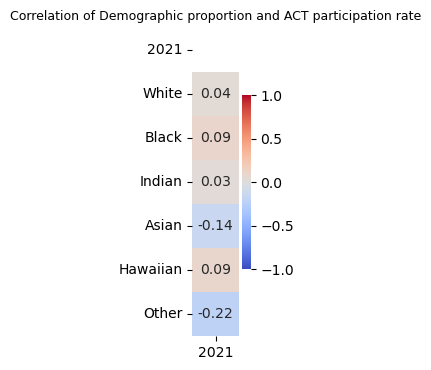

In [116]:
# Heatmap of population demographic to 2021 act participation rates
tmp_corr = act_part[['State',2021]].merge(race_data, how = 'inner', left_on = 'State', right_on = 'State')
mask = np.zeros_like(tmp_corr.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (0.75,4))
sns.heatmap(data = tmp_corr.corr()[[2021]], 
            fmt = '.2f', 
            annot = True, 
            cmap = 'coolwarm',
            vmin = -1, vmax = 1,
            mask = mask[:,[0]])
plt.yticks(rotation = 0)
plt.title('Correlation of Demographic proportion and ACT participation rate', fontsize = 9);

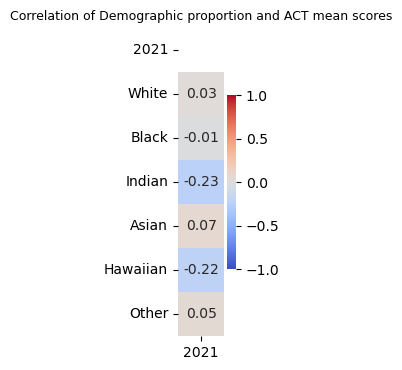

In [118]:
# Heatmap of population demographic to 2021 act mean scores
tmp_corr = act_mean[['State',2021]].merge(race_data, how = 'inner', left_on = 'State', right_on = 'State')
mask = np.zeros_like(tmp_corr.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (0.75,4))
sns.heatmap(data = tmp_corr.corr()[[2021]], 
            fmt = '.2f', 
            annot = True, 
            cmap = 'coolwarm',
            vmin = -1, vmax = 1,
            mask = mask[:,[0]])
plt.yticks(rotation = 0)
plt.title('Correlation of Demographic proportion and ACT mean scores', fontsize = 9);

For the heatmaps, we will focus only on the first column, looking at the relationship of 2021 scores to the various demographic proportions. Much to my surprise, there doesn't seem to be much of a relationship between the proportions of racial demographic in a given state, and its participation rates or mean scores in the ACTs. This relationship seems to be the same for the SATs as well.

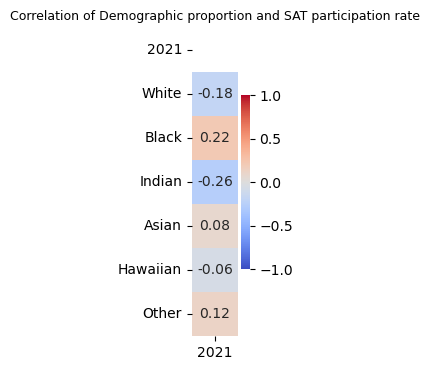

In [119]:
# Heatmap of population demographic to 2021 sat participation rates
tmp_corr = sat_part[['State',2021]].merge(race_data, how = 'inner', left_on = 'State', right_on = 'State')
mask = np.zeros_like(tmp_corr.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (0.75,4))
sns.heatmap(data = tmp_corr.corr()[[2021]], 
            fmt = '.2f', 
            annot = True, 
            cmap = 'coolwarm',
            vmin = -1, vmax = 1,
            mask = mask[:,[0]])
plt.yticks(rotation = 0)
plt.title('Correlation of Demographic proportion and SAT participation rate', fontsize = 9);

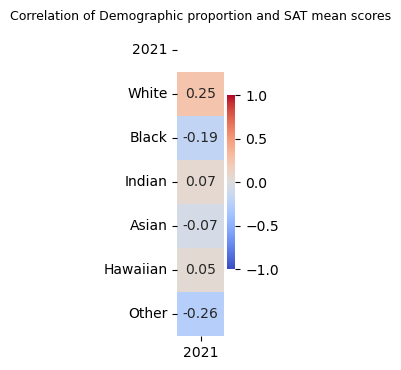

In [120]:
# Heatmap of population demographic to 2021 sat mean scores
tmp_corr = sat_mean[['State',2021]].merge(race_data, how = 'inner', left_on = 'State', right_on = 'State')
mask = np.zeros_like(tmp_corr.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (0.75,4))
sns.heatmap(data = tmp_corr.corr()[[2021]], 
            fmt = '.2f', 
            annot = True, 
            cmap = 'coolwarm',
            vmin = -1, vmax = 1,
            mask = mask[:,[0]])
plt.yticks(rotation = 0)
plt.title('Correlation of Demographic proportion and SAT mean scores', fontsize = 9);

Looking at the correlation plots for the demographic proportions to mean scores and participation rates of the two standardised tests, we can probably conclude that these metrics are not very related, since they have < 50% correlation (even <25%) in relation to test scores.

With correlation scores like these it informs us that any other investigation into the population demographic spread with regards to the standardised test scores would be quite redundant.

### CONCLUSION TO EDA AND WHAT IT SAYS
From the study we have conducted, we can conduct a few things about the state of standardised tests following the pandemic:
1. The data does seem to support the conjecture that standardised testing participation rates are on the fall, and we may very well be witnessing the start of the end for standardised tests as a cornerstone of educational gatekeeping to colleges moving forward.

2. In the future, because of the shift to less participation (arguably indicating a shift towards a more optional mindset), there seems to be a preference within communities towards either one of the available tests, should a candidate decide to take them. This preference too seems somewhat linked to party-alignment, which would also be correlated to the state-government affiliation at the policy-making level.

3. Whilst there may still be disproportionate demographical effects at play, high-level racial population proportion is not a good proxy for inferring any useful information about the SAT/ACTs.

### RECOMMENDATIONS AND LIMITATIONS
- Lookout for colleges requirements as they evolve over time, as it looks like standardised tests as a compulsory requirement is on the way out.

- There are countless other dimensions of which we can analyse the effects of COVID and changing industry sentiments towards standardised testing, and in this EDA we have just looked at a couple.

- As educational policies evolve over time, some of the factors discussed may or may not become relevant. Perhaps even, there is even a chance that standardised tests as we know it would be phased out entirely, making any analysis on the current system obselete, or at least redundant.